<a href="https://colab.research.google.com/github/neemasingh/neema/blob/master/stock_price_prediction_using_GRU/ATSA_Arima_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1061 samples, validate on 118 samples
Epoch 1/500




1061/1061 [==============================] - 1s 1ms/step - loss: 0.0805 - val_loss: 0.0888
Epoch 2/500
1061/1061 [==============================] - 0s 424us/step - loss: 0.0687 - val_loss: 0.0747
Epoch 3/500
1061/1061 [==============================] - 0s 413us/step - loss: 0.0542 - val_loss: 0.0509
Epoch 4/500
1061/1061 [==============================] - 0s 407us/step - loss: 0.0355 - val_loss: 0.0262
Epoch 5/500
1061/1061 [==============================] - 0s 407us/step - loss: 0.0157 - val_loss: 0.0073
Epoch 6/500
1061/1061 [==============================] - 0s 403us/step - loss: 0.0035 - val_loss: 0.0011
Epoch 7/500
1061/1061 [==============================] - 0s 425us/step - loss: 0.0012 - val_loss: 0.0017


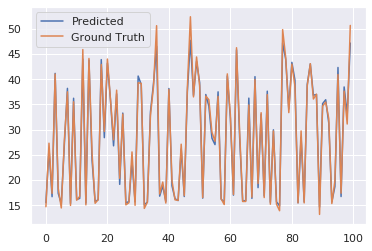

In [0]:
import pandas as pd
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import GRU
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

prices = pd.read_csv('/content/prices_stock.csv', index_col=['date'])

# selecting YHOO stocks
yahoo = prices[prices['symbol']=='YHOO']

# preparing input features
yahoo = yahoo.drop(['symbol'], axis=1)
yahoo = yahoo.drop(['volume'], axis=1)
yahoo = yahoo[['open', 'low', 'high', 'close']]

# preparing label data
yahoo_shift = yahoo.shift(-1)
label = yahoo_shift['close']

# adjusting the shape of both
yahoo.drop(yahoo.index[len(yahoo)-1], axis=0, inplace=True)
label.drop(label.index[len(label)-1], axis=0, inplace=True)

# conversion to numpy array
x, y = yahoo.values, label.values

# scaling values for model
x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

X = x_scale.fit_transform(x)
Y = y_scale.fit_transform(y.reshape(-1,1))

# splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
X_train = X_train.reshape((-1,1,4))
X_test = X_test.reshape((-1,1,4))

# creating model using Keras
# tf.reset_default_graph()

model_name = 'stock_price_GRU'

model = Sequential()
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(1, 4)))
model.add(Dropout(0.2))
model.add(GRU(units=256))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')

# model = load_model("{}.h5".format(model_name))
# print("MODEL-LOADED")

model.fit(X_train,y_train,batch_size=250, epochs=500, validation_split=0.1, verbose=1)
model.save("{}.h5".format(model_name))
print('MODEL-SAVED')

score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))
yhat = model.predict(X_test)
yhat = y_scale.inverse_transform(yhat)
y_test = y_scale.inverse_transform(y_test)
plt.plot(yhat[-100:], label='Predicted')
plt.plot(y_test[-100:], label='Ground Truth')
plt.legend()
plt.show()